# Introduction

This is the first _notebook_ of the **Deep Learning Bootcamp**.

- Introduction
- Theory
- CNN
- Transfer Learning

![altText](http://lorempixel.com/200/200)

This is run by [Jayanth](https://github.com/jchikatur)

# Basic Data Structure in Python

Variables

In [19]:
x = 2
y = 3.0

In [20]:
x + y

5.0

In [21]:
type(x), type(y)

(int, float)

Array

In [22]:
x = [1,2,5,7]

In [23]:
type(x)

list

In [24]:
for i in x:
    print(i*i)

1
4
25
49


# Numpy

In [25]:
import numpy as np

In [26]:
a = np.arange(10)

In [27]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
a.mean()

4.5

In [29]:
a.dtype, a.shape

(dtype('int64'), (10,))

In [30]:
b = np.array([[1,2,3], [4,5,6]])

In [31]:
b.shape

(2, 3)

## Image classification

In [3]:
import numpy as np
import tensorflow as tf
import keras                           # wrapper on tensorflow

In [6]:
from keras.datasets import fashion_mnist

In [5]:
! wget http://bit.do/deephelper

--2018-03-10 09:54:29--  http://bit.do/deephelper
Resolving bit.do (bit.do)... 54.83.52.76
Connecting to bit.do (bit.do)|54.83.52.76|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/rouseguy/f3b0c511eb303a4b05051adbdcb50e11/raw/71436ea41bc738f9c04b8927af9fda49ee708bbd/helpers.py [following]
--2018-03-10 09:54:29--  https://gist.githubusercontent.com/rouseguy/f3b0c511eb303a4b05051adbdcb50e11/raw/71436ea41bc738f9c04b8927af9fda49ee708bbd/helpers.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.32.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6245 (6.1K) [text/plain]
Saving to: ‘deephelper.3’

deephelper.3        100%[===================>]   6.10K  --.-KB/s    in 0s      

2018-03-10 09:54:29 (63.8 MB/s) - ‘deephelper.3’ saved [6245/6245]



In [35]:
! ls

Introduction.ipynb  data	deephelper.1  helpers.py  roro.yml
__pycache__	    deephelper	deephelper.2  logs


In [36]:
#! mv deephelper helpers.py

In [37]:
#! cat helpers.py

## Get the data

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
x_train.ndim

3

## View the datasets

In [10]:
import matplotlib.pyplot as plt
% matplotlib inline

## See one image

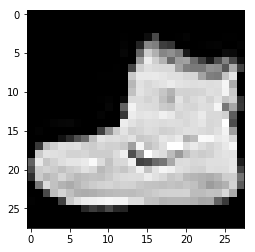

In [11]:
plt.imshow(x_train[0], cmap="gray")               # 0 - black 255 - white

In [12]:
from helpers import fashion_mnist_label

In [13]:
label = fashion_mnist_label()
label

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [14]:
y_train[0]

9

In [15]:
 def image(index):
        plt.imshow(x_train[index], cmap="gray")
        plt.title(label[y_train[index]])

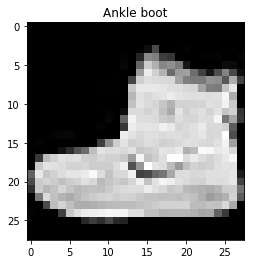

In [16]:
image(0)

## One image of each class

In [17]:
u, indices, counts = np.unique(y_train, return_index=True, return_counts=True)
u, indices, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 1, 16,  5,  3, 19,  8, 18,  6, 23,  0]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

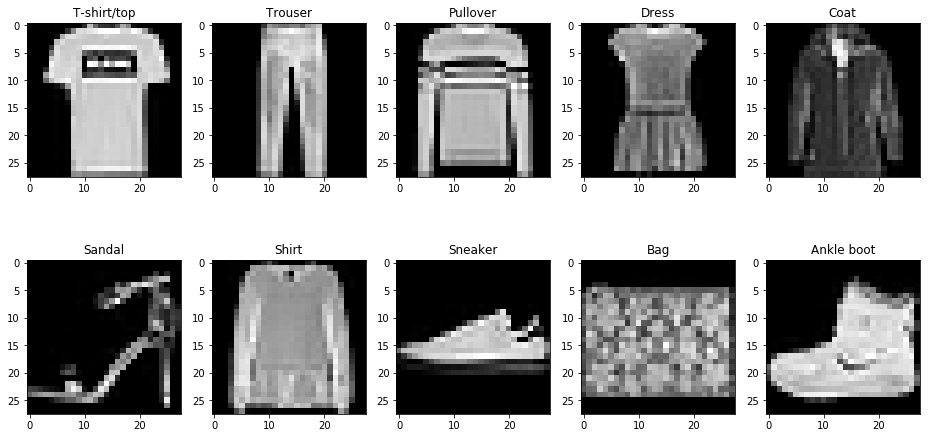

In [49]:
plt.figure(figsize=[16, 8])
for i in u:
    plt.subplot(2,5, i+1)
    image(indices[i])

## See 500 of the images

In [18]:
from helpers import create_sprite

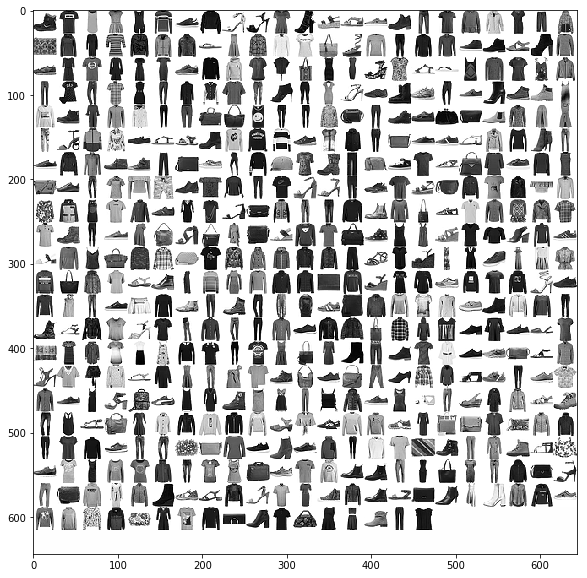

In [19]:
sprite = 1 - create_sprite(x_train[:500])
plt.figure(figsize=(10,10))
plt.imshow(sprite, cmap="gray")

In [20]:
from helpers import create_embedding

In [21]:
create_embedding('fashion_mnist', 'fashion_mnist_embedding', 500)

Extracting data/fashion_mnist/train-images-idx3-ubyte.gz
Extracting data/fashion_mnist/train-labels-idx1-ubyte.gz
Extracting data/fashion_mnist/t10k-images-idx3-ubyte.gz
Extracting data/fashion_mnist/t10k-labels-idx1-ubyte.gz

    Created embedding in the directory -> logs/fashion_mnist_embedding/ 
    Run the following command from the terminal
    
    tensorboard --logdir=logs/fashion_mnist_embedding/


## ML Model
Input -> Flattern -> PCA(2) -> Classifier -> Output

### Step 1: Preprocessing image and labels

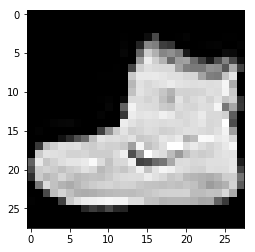

In [22]:
plt.imshow(x_train[0], cmap="gray")

In [23]:
# Convert type and normalize to (0,1)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [24]:
# Flatten the data from (60000, 28, 28) to (60000, 784)
x_train_flatten = x_train.reshape(60000, 28*28)
x_test_flatten = x_test.reshape(10000, 28*28)

In [25]:
# Convert class vector to binary class matrices
from keras.utils import to_categorical
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

### Step 2: Craft the feature transformation

In [26]:
# Do the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train_flatten)
x_train_feature_2 = pca.transform(x_train_flatten)
x_test_feature_2 = pca.transform(x_test_flatten)

In [27]:
x_train_feature_2

array([[-0.48668092,  6.4041204 ],
       [ 5.520857  , -1.7712351 ],
       [-2.8471396 , -4.321026  ],
       ...,
       [ 3.3632932 , -4.628487  ],
       [-3.1670048 , -2.27938   ],
       [-7.1206794 , -0.46967226]], dtype=float32)

### Step 3: Create a Learning model

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model_simple2 = Sequential()
model_simple2.add(Dense(10, input_shape = (2,),
                         activation="softmax"))

In [30]:
model_simple2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


### Step 4: Compile and Fit the model

In [31]:
model_simple2.compile(loss='categorical_crossentropy',
                     optimizer="sgd",
                     metrics=['accuracy'])

In [64]:
%time
model_simple2.fit(x_train_feature_2, y_train_class,
                 batch_size=128, epochs=100,verbose=1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21.5 µs
Epoch 1/100
60000/60000 [==============================] - 1s 12us/step - loss: 1.7227 - acc: 0.3589
Epoch 2/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.4353 - acc: 0.4452
Epoch 3/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.4066 - acc: 0.4503
Epoch 4/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.3857 - acc: 0.4539
Epoch 5/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.3689 - acc: 0.4589
Epoch 6/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.3547 - acc: 0.4594
Epoch 7/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.3427 - acc: 0.4610
Epoch 8/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.3322 - acc: 0.4641
Epoch 9/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.3230 - acc: 0.4660
Epoch 10/100
60000/60000 [=

### Step 5: check the performance

In [65]:
score = model_simple2.evaluate(x_test_feature_2, y_test_class)

10000/10000 [==============================] - 0s 18us/step


In [66]:
print("test loss", score[0])
print("test accuracy", score[1])

test loss 1.2126090953826905
test accuracy 0.5034


### Step 6: Make and Visualize a prediction

In [67]:
model_simple2.predict_proba(x_test_feature_2)[0]

array([2.95867244e-06, 7.50271012e-10, 5.14431274e-04, 1.05401334e-07,
       8.85914560e-05, 2.61840820e-01, 1.94754160e-04, 5.60901642e-01,
       3.38816792e-02, 1.42575115e-01], dtype=float32)

In [39]:
from helpers import plot_prediction, plot_2d_model

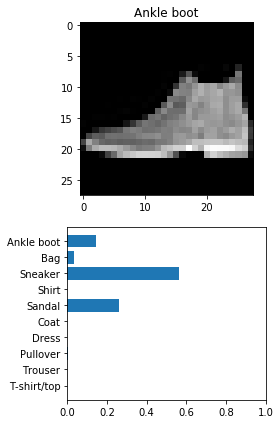

In [69]:
plot_prediction(0, x_test, y_test, x_test_feature_2, model_simple2)

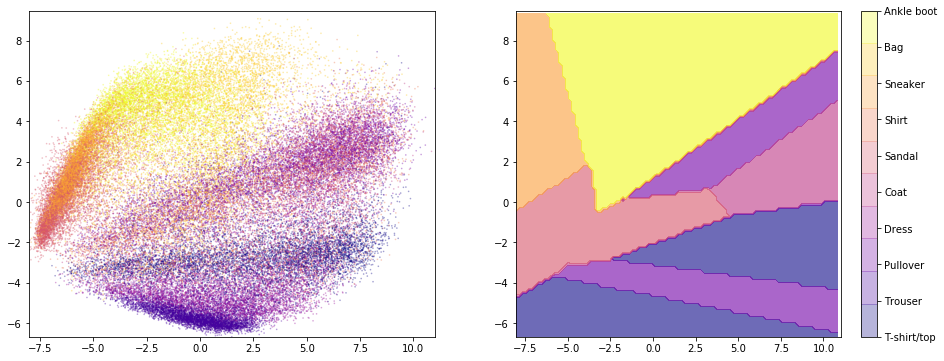

In [70]:
plot_2d_model(model_simple2, x_train_feature_2, y_train)

## Deep Learning Network

### Step 2 & 3: Learn the transformation & classifier together

In [32]:
model_simple_dl = Sequential()
model_simple_dl.add(Dense(100, input_shape = (784,),
                   activation="linear"))
model_simple_dl.add(Dense(10, activation="softmax"))

In [33]:
model_simple_dl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
## Step 5
model_simple_dl.compile(loss='categorical_crossentropy',
                     optimizer="sgd",
                     metrics=['accuracy'])

In [42]:
from helpers import MetricHistory

In [43]:
history = MetricHistory()

In [44]:
%time
model_simple_dl.fit(x_train_flatten, y_train_class,
                 batch_size=128, epochs=20,verbose=1,
                   callbacks=[history])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.3 µs
Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4268 - acc: 0.8533
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4250 - acc: 0.8538
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4232 - acc: 0.8543
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4213 - acc: 0.8543
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4198 - acc: 0.8553
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4179 - acc: 0.8561
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4168 - acc: 0.8562
Epoch 8/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4159 - acc: 0.8571
Epoch 9/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4141 - acc: 0.8567
Epoch 10/20
60000/60000 [===========

### Step 5: Score the model

In [45]:
score = model_simple_dl.evaluate(x_test_flatten, y_test_class)

10000/10000 [==============================] - 0s 30us/step


(0, 1)

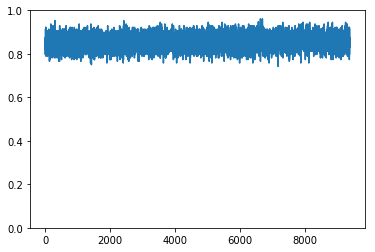

In [46]:
plt.plot(history.accuracy)
plt.ylim(0,1)

In [37]:
print("test loss", score[0])
print("test accuracy", score[1])

test loss 0.46635284490585327
test accuracy 0.8345


### Step 6: Make and Visualise a prediction

In [38]:
model_simple_dl.predict_proba(x_test_flatten)[0]

array([2.9837292e-06, 4.8618035e-06, 8.7517556e-06, 7.2747011e-06,
       1.1049812e-05, 1.2302706e-01, 2.7340880e-05, 2.2026825e-01,
       4.9611120e-03, 6.5168136e-01], dtype=float32)

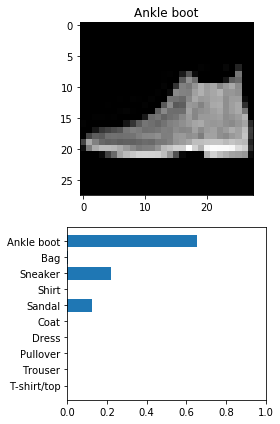

In [41]:
plot_prediction(0, x_test, y_test, x_test_flatten, model_simple_dl)

In [72]:
model_simple_dl3 = Sequential()
model_simple_dl3.add(Dense(800, input_shape=(784,),
                          activation="relu"))
model_simple_dl3.add(Dense(100, activation="relu"))
model_simple_dl3.add(Dense(100, activation="relu"))
model_simple_dl3.add(Dense(10, activation="softmax"))

In [73]:
model_simple_dl3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               80100     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 719,210
Trainable params: 719,210
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_simple_dl3.compile(loss='categorical_crossentropy',
                     optimizer="sgd",
                     metrics=['accuracy'])

In [75]:
history = MetricHistory()

In [76]:
%time
model_simple_dl3.fit(x_train_flatten, y_train_class,
                 batch_size=128, epochs=100,verbose=1,
                   callbacks=[history])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16 µs
Epoch 1/100
60000/60000 [==============================] - 5s 79us/step - loss: 1.0310 - acc: 0.6797
Epoch 2/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.5943 - acc: 0.8017
Epoch 3/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.5146 - acc: 0.8227
Epoch 4/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.4786 - acc: 0.8335
Epoch 5/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.4556 - acc: 0.8405
Epoch 6/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.4370 - acc: 0.8472
Epoch 7/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.4234 - acc: 0.8529
Epoch 8/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.4099 - acc: 0.8567
Epoch 9/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.4021 - acc: 0.8595
Epoch 10/100
60000/60000 [===

In [77]:
score = model_simple_dl3.evaluate(x_test_flatten, y_test_class)

10000/10000 [==============================] - 1s 57us/step


(0, 1)

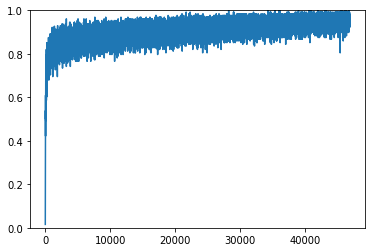

In [78]:
plt.plot(history.accuracy)
plt.ylim(0,1)

In [79]:
model_simple_dl3.predict_proba(x_test_flatten)[0]

array([3.2262260e-06, 7.9825867e-08, 2.6488804e-06, 1.2399285e-07,
       5.8750294e-09, 4.7631265e-04, 2.2948723e-07, 7.5257639e-03,
       6.4877058e-06, 9.9198508e-01], dtype=float32)

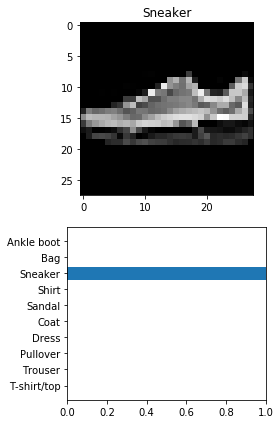

In [82]:
plot_prediction(9, x_test, y_test, x_test_flatten, model_simple_dl3)